Для выполнения тестового задания требуется разработать модель, которая будет способна различать заголовки реальных и выдуманных новостей.
Для обучения модели используйте данные из файла `train.tsv`. В файле находится таблица, состоящая из двух колонок. 
В колонке title записан заголовок новости. В колонке is_fake содержатся метки: 0 – новость реальная; 1 – новость выдуманная.
Для демонстрации работы модели используйте данные тестового набора из файла `test.tsv`. В нем также есть колонка title, данные которой являются входными для вашей модели.

Критерии оценки
1. Для оценки финального решения будет использоваться метрика F1 score.
2. Чистота кода, оформление и понятность исследования.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Загружаем датасет
news_d = pd.read_csv('/content/drive/MyDrive/train.tsv', sep='\t')

In [8]:
news_d.shape

(5758, 2)

In [ ]:
news_d

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


In [9]:
title_length = news_d.title.str.split().str.len()
title_length.describe()

count    5758.000000
mean        8.723689
std         2.810851
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        37.000000
Name: title, dtype: float64

1    2879
0    2879
Name: is_fake, dtype: int64


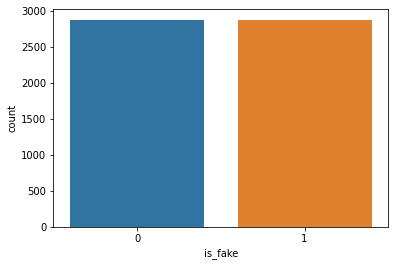

In [10]:
sns.countplot(x='is_fake', data=news_d)
print(news_d.is_fake.value_counts())

In [11]:
print(round(news_d.is_fake.value_counts(normalize=True),2)*100)

1    50.0
0    50.0
Name: is_fake, dtype: float64


In [12]:
news_d.isnull().count()

title      5758
is_fake    5758
dtype: int64

In [13]:
news_d.rename(columns = {'is_fake':'label'}, inplace = True)

In [14]:
news_d

,title,label
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


Очистка данных для последующего анализа

In [15]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [16]:
categorical_features = []
target_col = ['label']
text_f = ['title']

In [17]:
ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('russian')
stopwords_dict = Counter(stop_words)

# Заполняем null значениями None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

# Очищаем текст от неиспользуемых знаков
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # убираем urls, если такие имеются
    text = str(text).replace(r'[^\.\w\s]', ' ')  # убираем все, кроме символов и знаков препинания
    text = str(text).replace('[^ё-яЁ-Я]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()   
    return text

# Удаляем стоп-слова
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [18]:
df = null_process(news_d)
df['title'] = df.title.apply(nltk_preprocess)

In [19]:
news_d

,title,label
0,москвичу владимиру клутину пришёл счёт вмешате...,1
1,агент кокорина назвал езду встречке житейской ...,0
2,госдума рассмотрит возможность введения секрет...,1
3,фас заблокировала поставку скоростных трамваев...,0
4,против навального завели дело недоносительстве...,1
...,...,...
5753,эдди чемберс получил сотрясение мозга бою кличко,0
5754,правительство застроит россию нефтепродуктопро...,0
5755,стыдно дедом новый канцлер фрг обратился перво...,1
5756,туркмения декабре начнет поставки газа китай,0


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

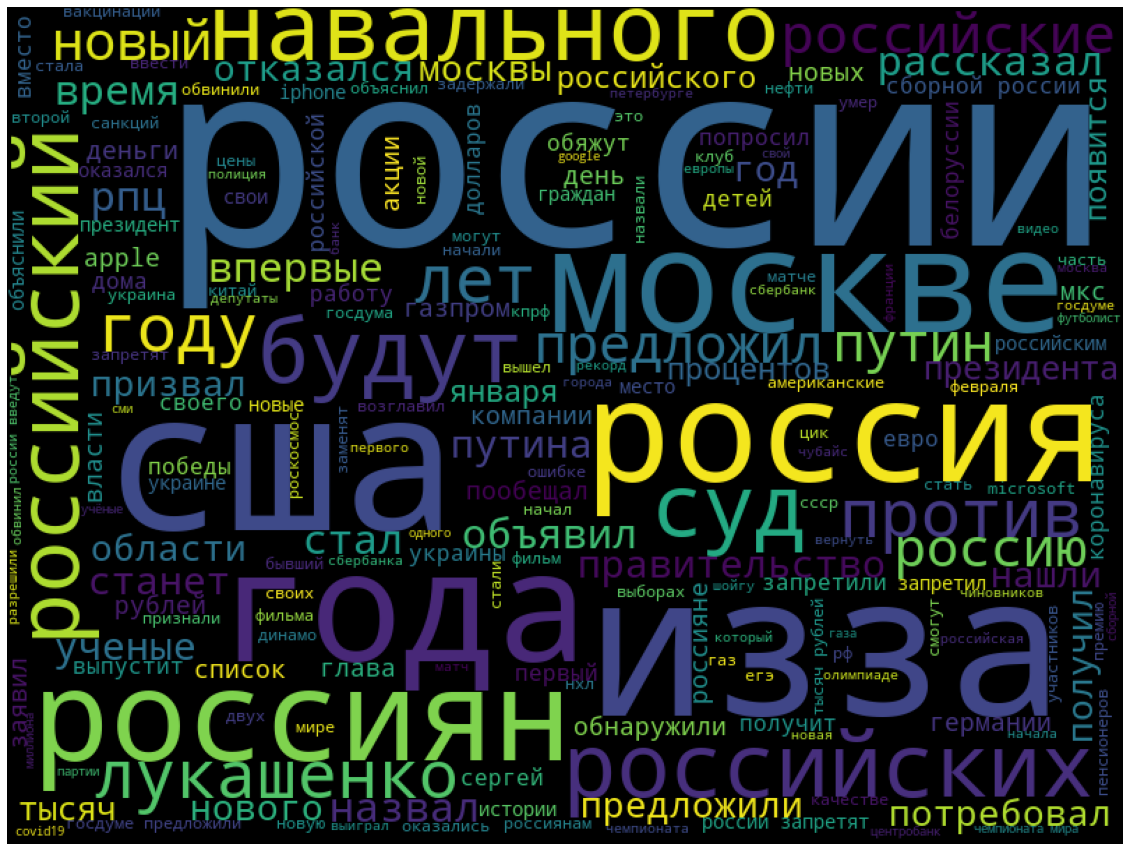

In [21]:
# Создаем облаков слов
wordcloud = WordCloud( background_color='black', width=800, height=600)
title_cloud = wordcloud.generate(' '.join(news_d['title']))
# Отрисовываем облако слов
plt.figure(figsize=(20,30))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

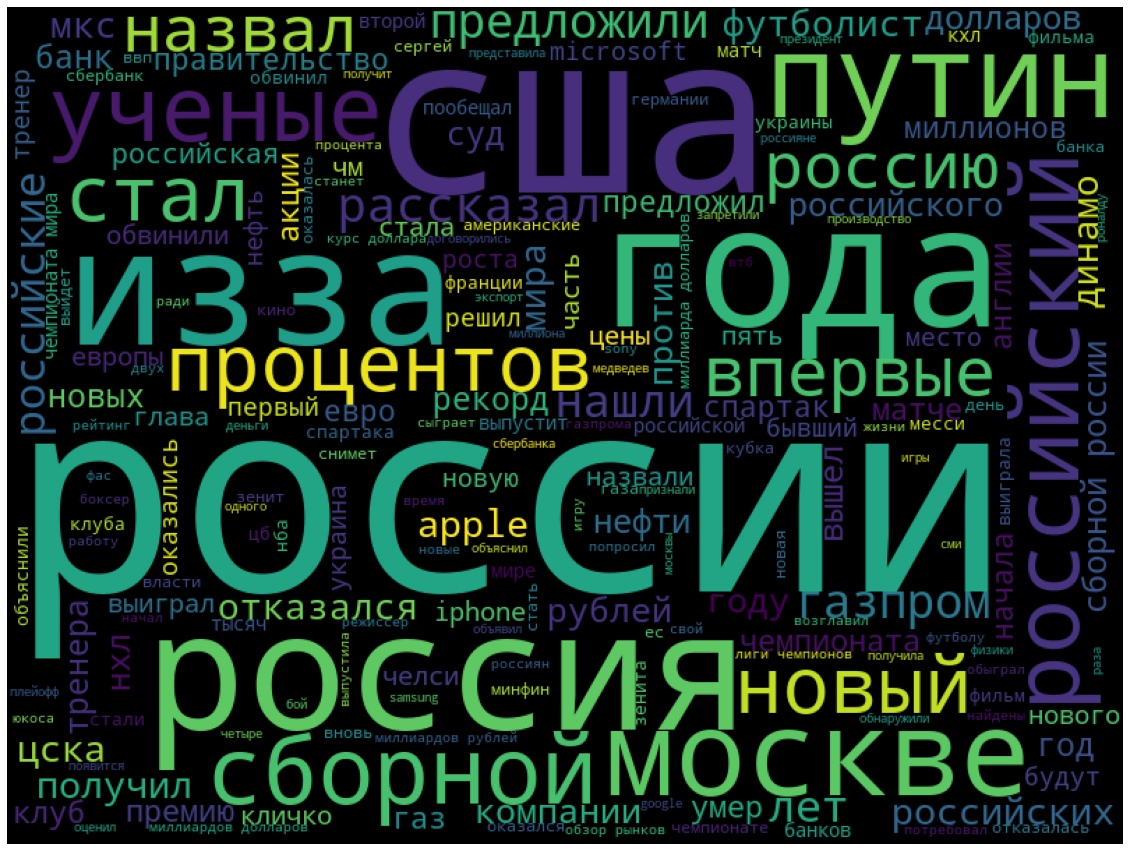

In [22]:
# Облако слов для достоверных новостей
true_n = ' '.join(news_d[news_d['label']==0]['title']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

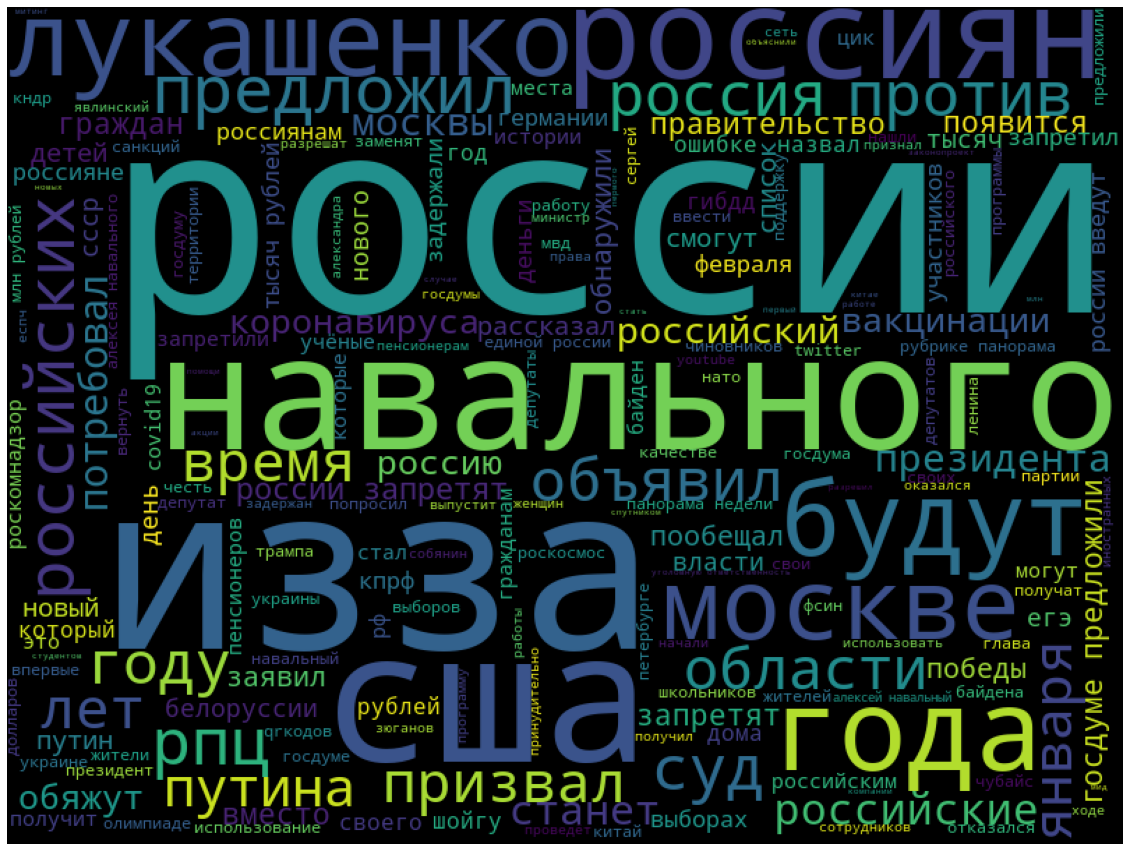

In [23]:
# Облако слов для недостоверных новостей
fake_n = ' '.join(news_d[news_d['label']==1]['title'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

Комбинация 2 наиболее часто встречаемых слов - Bigram

In [24]:
def plot_top_ngrams(corpus, title, ylabel, xlabel='Число появлений', n=2):
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

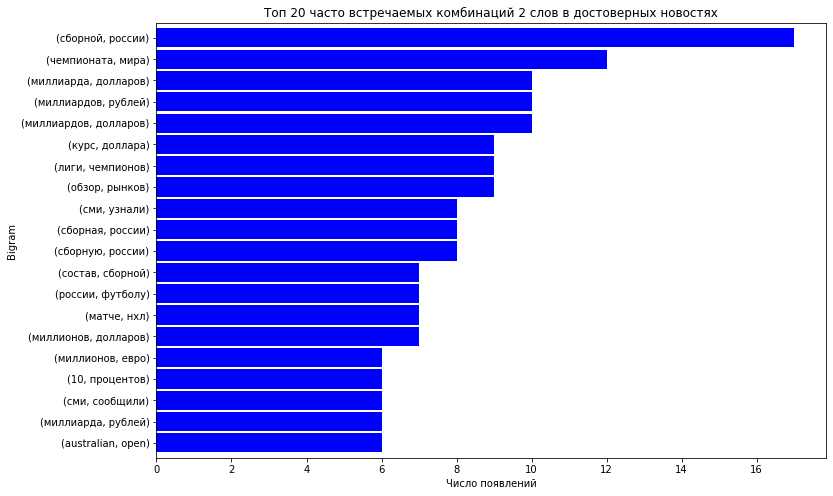

In [25]:
plot_top_ngrams(true_n, 'Топ 20 часто встречаемых комбинаций 2 слов в достоверных новостях', 'Bigram', n=2)

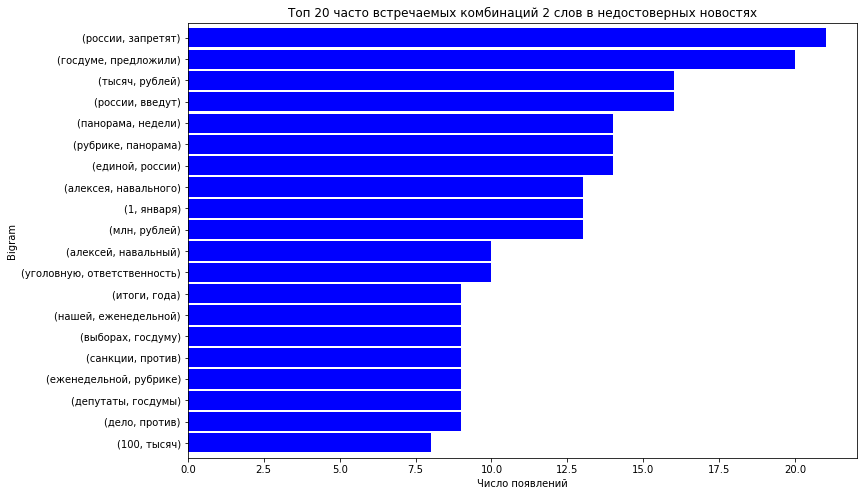

In [26]:
plot_top_ngrams(fake_n, 'Топ 20 часто встречаемых комбинаций 2 слов в недостоверных новостях', 'Bigram', n=2)

Комбинация 3 наиболее часто встречаемых слов - Trigram

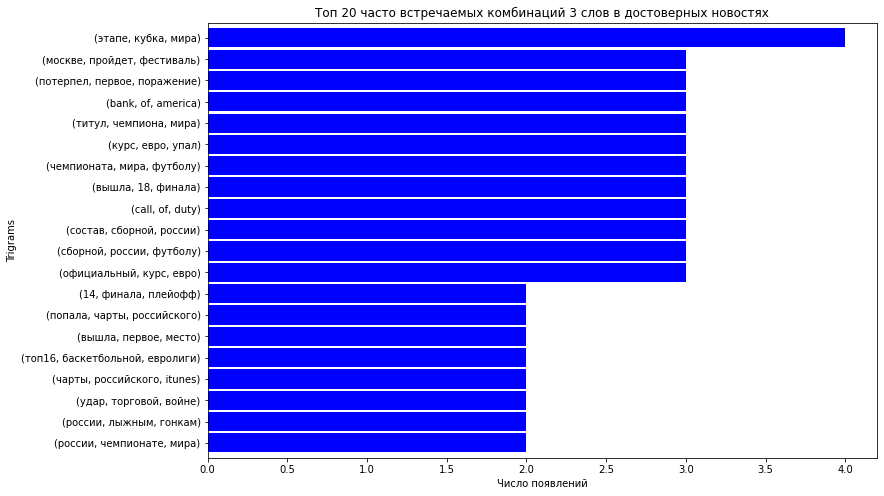

In [27]:
plot_top_ngrams(true_n, 'Топ 20 часто встречаемых комбинаций 3 слов в достоверных новостях', 'Trigrams', n=3)

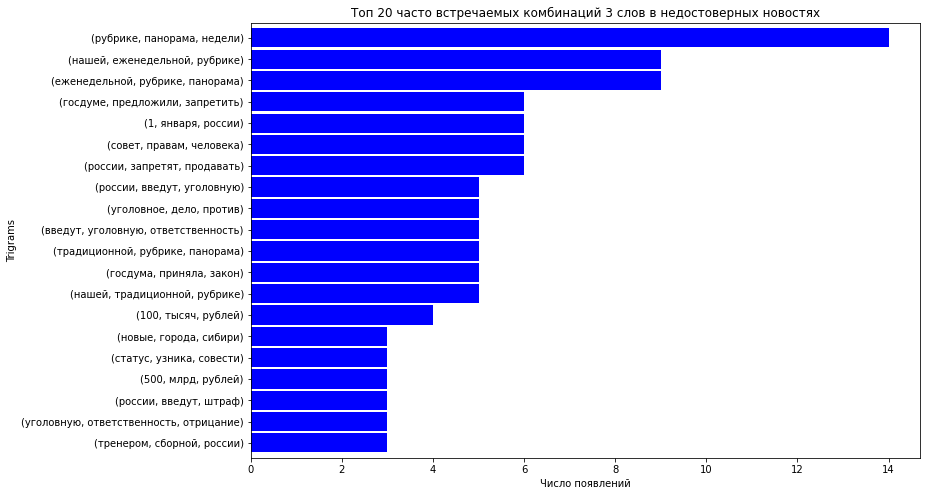

In [28]:
plot_top_ngrams(fake_n, 'Топ 20 часто встречаемых комбинаций 3 слов в недостоверных новостях', 'Trigrams', n=3)

Создаем классификатор на основе модели BERT

In [32]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 38.2 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 6.6 MB 37.9 MB/s 
     |████████████████████████████████| 895 kB 44.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [33]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [34]:
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [35]:
model_name = 'bert-base-uncased'
max_length = 400

In [36]:
# Загружаем токенизатор
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Подготовка данных к анализу

In [37]:
def prepare_data(news_d, test_size=0.2, include_title=True):
  titles = []
  labels  = []
  for i in range(len(news_d)):
    title = news_d['title'].iloc[i]
    label = news_d['label'].iloc[i]
    if include_title:
      title = news_d['title'].iloc[i] + ' - ' + title
    if title and label in [0, 1]:
      titles.append(title)
      labels.append(label)
  return train_test_split(titles, labels, test_size=test_size)

train_titles, valid_titles, train_labels, valid_labels = prepare_data(news_d)

In [38]:
print(len(train_titles), len(train_labels))
print(len(valid_titles), len(valid_labels))

4606 4606
1152 1152


Токенизируем датасет

In [39]:
train_encodings = tokenizer(train_titles, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_titles, truncation=True, padding=True, max_length=max_length)

In [40]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# Преобразуем токенизированный датасет в torch-датасет
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [41]:
# Загружаем модель
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [47]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels  = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # Вычисление точности
  acc = accuracy_score(labels, preds)
  f1 = f1_score(labels, preds)
  return {
      'accuracy': acc, 'f1_score': f1,
  }

In [48]:
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=5,             
    per_device_train_batch_size=20,  
    per_device_eval_batch_size=20,   
    warmup_steps=100,                
    logging_dir='./logs',            
    load_best_model_at_end=True,     
    logging_steps=200,               
    save_steps=200,
    evaluation_strategy='steps',     
)

using `logging_steps` to initialize `eval_steps` to 200
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [49]:
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=valid_dataset,          
    compute_metrics=compute_metrics,     
)

In [50]:
# Обучение модели
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4606
  Num Epochs = 5
  Instantaneous batch size per device = 20
  Total train batch size (w. parallel, distributed & accumulation) = 20
  Gradient Accumulation steps = 1
  Total optimization steps = 1155


Step,Training Loss,Validation Loss,Accuracy,F1 Score
200,0.379500,0.444859,0.794271,0.778711
400,0.314800,0.438332,0.825521,0.817770
600,0.233300,0.557132,0.819444,0.813953
800,0.215800,0.591193,0.838542,0.822519
1000,0.156300,0.832270,0.832465,0.802051


***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
****

TrainOutput(global_step=1155, training_loss=0.23859865593187737, metrics={'train_runtime': 2512.9975, 'train_samples_per_second': 9.164, 'train_steps_per_second': 0.46, 'total_flos': 3420274136382600.0, 'train_loss': 0.23859865593187737, 'epoch': 5.0})

Оценка модели

In [51]:
# Оцениваем нашу модель после обучения
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20


{'epoch': 5.0,
 'eval_accuracy': 0.8255208333333334,
 'eval_f1_score': 0.8177697189483226,
 'eval_loss': 0.4383317828178406,
 'eval_runtime': 43.7182,
 'eval_samples_per_second': 26.351,
 'eval_steps_per_second': 1.327}

In [52]:
# Сохраняем модель и токенизатор
model_path = 'fake-news-bert-base-uncased'
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [53]:
def get_prediction(text, convert_to_label=False):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors='pt').to('cuda')
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    d = {
        0: 'достоверно',
        1: 'недостоверно'
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

Используем тестовый датасет

In [55]:
test_df = pd.read_csv('/content/drive/MyDrive/test.tsv', sep='\t')

In [56]:
test_df

,title,is_fake
0,Роскомнадзор представил реестр сочетаний цвето...,0
1,Ночью под Минском на президентской горе Белара...,0
2,Бывший спичрайтер Юрия Лозы рассказал о трудно...,0
3,"Сельская церковь, собравшая рекордно низкое ко...",0
4,Акции Google рухнули после объявления о переза...,0
...,...,...
995,Прокуратура заподозрила Явлинского в авторитар...,0
996,В День Победы стратегические ракетоносцы Ту-16...,0
997,СК возбудил дело против авиакомпании «Победа» ...,0
998,Криптомонетный двор Туркменистана выпустил юби...,0


In [61]:
# Создаем предсказания для тестового датасета
test_df['label'] = test_df['title'].apply(get_prediction)
# Сохраняем предсказания
final_df = test_df[['title', 'label']]
final_df=final_df.rename(columns={'label':'is_fake'})
final_df.to_csv('/content/drive/MyDrive/predictions.tsv', index=False, sep='\t')

In [62]:
pred_d = pd.read_csv('/content/drive/MyDrive/predictions.tsv', sep='\t')

In [63]:
pred_d

,title,is_fake
0,Роскомнадзор представил реестр сочетаний цвето...,1
1,Ночью под Минском на президентской горе Белара...,1
2,Бывший спичрайтер Юрия Лозы рассказал о трудно...,0
3,"Сельская церковь, собравшая рекордно низкое ко...",1
4,Акции Google рухнули после объявления о переза...,1
...,...,...
995,Прокуратура заподозрила Явлинского в авторитар...,0
996,В День Победы стратегические ракетоносцы Ту-16...,1
997,СК возбудил дело против авиакомпании «Победа» ...,1
998,Криптомонетный двор Туркменистана выпустил юби...,0


1    548
0    452
Name: is_fake, dtype: int64


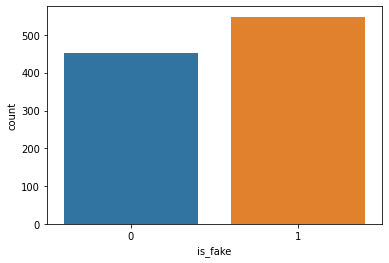

In [64]:
sns.countplot(x='is_fake', data=pred_d)
print(pred_d.is_fake.value_counts())